<a href="https://colab.research.google.com/github/tiagopessoalima/TATI/blob/main/Aula_Semana_04_(TATI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Manipulação e Limpeza de Dados**

Essas etapas são fundamentais no preparo dos dados para análises e modelagens eficazes.

A **manipulação de dados** consiste em transformar, reorganizar e estruturar as informações de forma que se tornem mais acessíveis e úteis. Isso inclui tarefas como filtragem, agregações, criação de novas variáveis, e a junção de diferentes fontes de dados.

A **limpeza de dados**, por sua vez, é voltada para a correção de problemas que comprometem a qualidade dos dados, como valores ausentes, inconsistências, erros de digitação e formatos não padronizados. Esse processo é essencial para garantir que a análise posterior seja precisa, confiável e reproduzível.

Vamos colocar esses conceitos em prática utilizando o conjunto de dados *California Housing Prices*.

## **Coleta de Dados**


O conjunto de dados será obtido diretamente do repositório GitHub do professor [Tiago Lima](https://github.com/tiagopessoalima), contendo o material traduzido na [aula anterior](https://github.com/tiagopessoalima/TATI/blob/main/Aula_Semana_03_(TATI).ipynb). Esse dataset corresponde à versão adaptada e comentada do California Housing Prices, utilizada como base para análises de dados e aprendizado de máquina. A versão original também pode ser encontrada no repositório de [Aurélien Géron](https://github.com/ageron) ou no [kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

### **Baixar os Dados**

Antes de iniciar a manipulação e limpeza dos dados, precisamos obter e preparar o conjunto de dados *California Housing Prices*. O código abaixo verifica se os dados já foram previamente baixados. Se não houver o arquivo localmente, ele realiza o *download* do arquivo compactado e extrai seu conteúdo para o diretório designado.



In [8]:
import os
import tarfile
from urllib.request import urlretrieve
from pathlib import Path

# Definição das URLs e caminhos
URL_RAIZ_DOWNLOAD = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
CAMINHO_DADOS_IMOVEIS = Path("datasets/housing")
URL_DADOS_IMOVEIS = URL_RAIZ_DOWNLOAD + "datasets/housing/housing.tgz"

# Criação do diretório, se ainda não existir
CAMINHO_DADOS_IMOVEIS.mkdir(parents=True, exist_ok=True)

# Caminhos dos arquivos
caminho_arquivo_tgz = CAMINHO_DADOS_IMOVEIS / "housing.tgz"
caminho_arquivo_csv = CAMINHO_DADOS_IMOVEIS / "housing.csv"

def baixar_dados():
    """Baixa o arquivo compactado de dados, caso ainda não esteja disponível localmente."""
    if not caminho_arquivo_tgz.exists():
        print(f"🔽 Baixando dados de {URL_DADOS_IMOVEIS}...")
        urlretrieve(URL_DADOS_IMOVEIS, caminho_arquivo_tgz)
        print("✅ Download concluído.")
    else:
        print(f"📁 Arquivo '{caminho_arquivo_tgz}' já existe. Pulando download.")

def extrair_dados():
    """Extrai o conteúdo do arquivo .tgz caso o CSV ainda não tenha sido extraído."""
    if not caminho_arquivo_csv.exists():
        print("📦 Extraindo conteúdo do arquivo compactado...")
        with tarfile.open(caminho_arquivo_tgz) as arquivo_tgz:
            arquivo_tgz.extractall(path=CAMINHO_DADOS_IMOVEIS)
        print(f"✅ Extração concluída. Dados disponíveis em '{caminho_arquivo_csv}'.")
    else:
        print(f"📄 Arquivo '{caminho_arquivo_csv}' já extraído. Pulando extração.")

# Execução das etapas
baixar_dados()
extrair_dados()

🔽 Baixando dados de https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz...
✅ Download concluído.
📦 Extraindo conteúdo do arquivo compactado...
✅ Extração concluída. Dados disponíveis em 'datasets/housing/housing.csv'.


### **Carregar os Dados**

Com os dados já extraídos, o próximo passo é carregá-los em um *DataFrame* utilizando a biblioteca *Pandas*. O código abaixo utiliza `pd.read_csv()` para ler o arquivo CSV e armazenar o conteúdo na variável `housing`, possibilitando a exploração e o processamento estruturado das informações ao longo da análise.

In [9]:
import pandas as pd

# Caminho para o arquivo CSV
caminho_csv = CAMINHO_DADOS_IMOVEIS / "housing.csv"

# Leitura dos dados em um DataFrame do Pandas
housing = pd.read_csv(caminho_csv)

## **Pré-processamento dos Dados**

Após a etapa de exploração, que proporcionou uma visão geral das características do conjunto de dados e de possíveis desafios, avançamos para o pré-processamento — uma fase essencial para garantir que os dados estejam prontos para serem utilizados por algoritmos de *Machine Learning*. O pré-processamento trata questões como:

- **Qualidade dos dados:** remoção de valores ausentes ou inconsistentes;

- **Escalonamento:** normalização ou padronização para garantir que as variáveis estejam na mesma escala;

- **Codificação:** conversão de variáveis categóricas em formatos numéricos;

- **Seleção e transformação de features:** escolha de variáveis relevantes e possíveis combinações ou alterações.

Essa etapa é determinante para melhorar o desempenho e a robustez dos modelos preditivos.

### **Tratamento de Valores Ausentes**



Quando lidamos com dados reais, é comum encontrar valores ausentes. Esses valores podem distorcer análises e prejudicar a performance dos modelos de *machine learning*. A seguir, exploraremos diferentes abordagens para lidar com valores ausentes, desde a remoção de registros até técnicas de substituição com base em estatísticas ou aprendizado.



#### **Exclusão de Linhas ou Colunas**


Remover todas as linhas que contêm ao menos um valor nulo é uma estratégia simples e direta de limpeza de dados. No entanto, essa abordagem pode levar à perda significativa de informações, especialmente quando há muitos registros com valores ausentes. Isso pode comprometer a representatividade dos dados e impactar negativamente a qualidade das análises e dos modelos preditivos.

In [ ]:
# Remove todas as linhas que contêm pelo menos um valor ausente
housing_sem_nulos = housing.dropna()

# Visualiza o DataFrame após a remoção das linhas incompletas
housing_sem_nulos

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,proximidade_ao_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,PERTO DA BAÍA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,PERTO DA BAÍA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,PERTO DA BAÍA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,PERTO DA BAÍA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,PERTO DA BAÍA
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INTERIOR
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INTERIOR
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INTERIOR
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INTERIOR


Excluir colunas com alta porcentagem de valores ausentes — geralmente acima de um limite pré-definido — é uma abordagem mais seletiva para lidar com dados incompletos. Essa estratégia preserva a maior parte dos registros, mas pode descartar variáveis potencialmente relevantes, o que pode comprometer a qualidade de modelos preditivos ou afetar a consistência das análises.

In [ ]:
# Define o limiar de tolerância para valores ausentes (ex: 30%)
limiar = 0.3

# Calcula a proporção de valores ausentes por coluna
proporcao_nulos = housing.isnull().mean()

# Seleciona apenas as colunas que têm menos de 30% de valores ausentes
colunas_validas = proporcao_nulos[proporcao_nulos < limiar].index

# Cria um novo DataFrame apenas com as colunas selecionadas
housing_filtrado = housing[colunas_validas]

# Exibe informações sobre o resultado
print(f"Colunas removidas: {set(housing.columns) - set(colunas_validas)}")
housing_filtrado.info()

Colunas removidas: set()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              20640 non-null  float64
 1   latitude               20640 non-null  float64
 2   idade_média_moradias   20640 non-null  float64
 3   total_cômodos          20640 non-null  float64
 4   total_quartos          20433 non-null  float64
 5   população              20640 non-null  float64
 6   domicílios             20640 non-null  float64
 7   renda_mediana          20640 non-null  float64
 8   valor_mediano_casas    20640 non-null  float64
 9   proximidade_ao_oceano  20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### **Imputação de Valores Ausentes**

A imputação é uma técnica que visa preencher os valores ausentes com estimativas baseadas nos dados disponíveis. A escolha do método de imputação depende do tipo de dado, da distribuição dos valores e do impacto que os valores ausentes têm no contexto da análise. A seguir, apresentamos algumas das principais técnicas para lidar com dados ausentes:

- **Média:** Para variáveis numéricas, uma das formas mais simples é substituir os valores ausentes pela média dos valores não ausentes dessa coluna. Essa técnica é eficaz quando os dados são relativamente simétricos e a média é representativa da distribuição.

In [ ]:
housing['renda_mediana'] = housing['renda_mediana'].fillna(housing['renda_mediana'].mean())

In [ ]:
from sklearn.impute import SimpleImputer

# Criar o imputador para média (numérico)
imputer = SimpleImputer(strategy='mean')  # Substitui valores ausentes pela média

# Imputar os valores ausentes na coluna 'renda_mediana'
housing['renda_mediana'] = imputer.fit_transform(housing[['renda_mediana']])

- **Mediana:** Quando os dados têm uma distribuição assimétrica ou contêm valores extremos (*outliers*), a mediana pode ser uma alternativa mais robusta. Ela representa o valor central de uma distribuição e é menos sensível a *outliers* do que a média.

In [ ]:
# Criar o imputador para mediana (numérico)
imputer = SimpleImputer(strategy='median')  # Substitui valores ausentes pela mediana

# Imputar os valores ausentes na coluna 'idade_média_moradias'
housing['idade_média_moradias'] = imputer.fit_transform(housing[['idade_média_moradias']])

- **Moda:** Para variáveis categóricas, a moda é o valor mais frequente em uma coluna. Substituir valores ausentes pela moda é útil quando a variável é qualitativa e a ausência de dados é rara.

In [ ]:
# Criar o imputador para moda (categórico)
imputer = SimpleImputer(strategy='most_frequent')  # Substitui valores ausentes pela moda

# Imputar os valores ausentes na coluna 'proximidade_ao_oceano'
housing['proximidade_ao_oceano'] = imputer.fit_transform(housing[['proximidade_ao_oceano']])

- **Métodos Avançados:** Para um tratamento mais sofisticado, é possível usar técnicas de imputação baseadas em modelos. O KNN (K-Nearest Neighbors) pode prever os valores ausentes com base nas características de registros semelhantes. Já a regressão pode ser usada para prever um valor ausente a partir de outras variáveis independentes.

In [ ]:
from sklearn.impute import KNNImputer

# Separar as colunas numéricas
housing_numerico = housing.select_dtypes(include=['float64', 'int64'])

# Criar o imputador KNN para preencher valores ausentes nas colunas numéricas
imputer = KNNImputer(n_neighbors=3)

# Imputar os valores ausentes nas colunas numéricas
housing_imputado_numerico = imputer.fit_transform(housing_numerico)

# Converter o resultado de volta para um DataFrame
housing_imputado_numerico = pd.DataFrame(housing_imputado_numerico, columns=housing_numerico.columns)

# Reunir novamente as colunas imputadas com as colunas categóricas
housing_categorico = housing.select_dtypes(exclude=['float64', 'int64'])

# Concatenar os dados imputados com as colunas categóricas (sem alterações)
housing_imputado = pd.concat([housing_imputado_numerico, housing_categorico], axis=1)

**ATENÇÃO:** Durante a imputação, é essencial evitar o vazamento de dados entre os conjuntos de treino e teste. O vazamento de dados ocorre quando informações do conjunto de teste são utilizadas para ajustar o modelo durante o treinamento, comprometendo a avaliação imparcial do desempenho do modelo. Imputar valores ausentes em todo o conjunto de dados antes da separação em treino e teste pode levar a um vazamento, pois os métodos de imputação podem utilizar informações dos dados de teste para ajustar as estimativas.

### **Identificação e Tratamento de Outliers:**

*Outliers* são observações que se desviam significativamente dos padrões gerais do conjunto de dados e podem comprometer a integridade do modelo. Identificar e tratar *outliers* é fundamental para garantir a robustez dos modelos preditivos. A identificação de *outliers* pode ser realizada através de métodos estatísticos e técnicas de visualização. O tratamento pode envolver a remoção dos *outliers*, a aplicação de transformações ou a utilização de algoritmos robustos que não sejam influenciados por esses valores extremos.

#### **Identificação por Métodos Estatísticos**

**Desvios Padrão:** O desvio padrão é uma medida de dispersão que indica o quão distantes os valores estão da média. Em distribuições normais (ou aproximadamente normais), valores que estão mais de 2 ou 3 desvios padrão da média podem ser considerados *outliers*.

In [ ]:
# Calcular a média e o desvio padrão da coluna 'total_quartos'
mean = housing['total_quartos'].mean()
std_dev = housing['total_quartos'].std()

# Definir os limites para identificar outliers (2 desvios padrão)
lower_limit = mean - 2 * std_dev
upper_limit = mean + 2 * std_dev

# Identificar os outliers
outliers = housing[(housing['total_quartos'] < lower_limit) | (housing['total_quartos'] > upper_limit)]

# Exibir resultados
print(f'Média: {mean}')
print(f'Desvio Padrão: {std_dev}')
print(f'Limite Inferior: {lower_limit}')
print(f'Limite Superior: {upper_limit}')
print('Outliers identificados:')
print(outliers[['total_quartos']])

Média: 537.8705525375618
Desvio Padrão: 421.3850700740322
Limite Inferior: -304.89958761050264
Limite Superior: 1380.6406926856262
Outliers identificados:
       total_quartos
95            2477.0
100           1414.0
101           1603.0
104           1914.0
116           1750.0
...              ...
20539         1516.0
20543         1820.0
20544         1857.0
20563         2640.0
20629         1856.0

[808 rows x 1 columns]


In [ ]:
# Definir a feature para análise
feature1 = 'total_cômodos'

# Calcular a média e o desvio padrão da feature
mean = housing[feature1].mean()
std_dev = housing[feature1].std()

# Definir o limiar para a detecção de outliers
threshold = 3

# Identificar outliers como valores que estão a mais de 'threshold' desvios padrão da média
outliers = housing[(housing[feature1] > mean + threshold * std_dev) |
                   (housing[feature1] < mean - threshold * std_dev)]

# Exibir os outliers identificados
outliers

**Intervalos Interquartis (IQR):** *Outliers* também podem ser identificados como valores que estão fora do intervalo de 1.5 vezes o IQR abaixo do primeiro quartil ou acima do terceiro quartil.

In [ ]:
# Calcular os quartis da coluna 'total_quartos'
Q1 = housing['total_quartos'].quantile(0.25)
Q3 = housing['total_quartos'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior para os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar os outliers
outliers_iqr = housing[(housing['total_quartos'] < limite_inferior) | (housing['total_quartos'] > limite_superior)]

# Exibir resultados
print(f"Q1 (1º quartil): {Q1}")
print(f"Q3 (3º quartil): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Limite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")
print("Outliers identificados com IQR:")
print(outliers_iqr[['total_quartos']])


Q1 (1º quartil): 296.0
Q3 (3º quartil): 647.0
IQR (Q3 - Q1): 351.0
Limite Inferior: -230.5
Limite Superior: 1173.5
Outliers identificados com IQR:
       total_quartos
95            2477.0
96            1331.0
98            1270.0
100           1414.0
101           1603.0
...              ...
20539         1516.0
20543         1820.0
20544         1857.0
20563         2640.0
20629         1856.0

[1271 rows x 1 columns]


#### **Tratamento de Outliers**

##### **Remoção**

Valores identificados como *outliers* podem ser removidos do conjunto de dados.

In [ ]:
# Filtra o DataFrame para excluir as linhas cujos índices estão presentes no DataFrame de outliers
df_cleaned = housing.loc[~housing.index.isin(outliers.index)].copy()

# Exibir o DataFrame limpo
df_cleaned

#### **Transformações**

**Transformações Logarítmicas:** Aplicar uma transformação logarítmica pode reduzir a influência de outliers.




In [ ]:
# Aplicar transformação logarítmica para estabilizar a variância e reduzir o impacto de outliers
transformed_data = np.log1p(housing[feature1])

# Criar o box plot para os dados transformados
plt.figure(figsize=(10, 6))
plt.boxplot(transformed_data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.title(f'Box Plot Transformado de {feature1}', fontsize=14)
plt.xlabel('Valores Logarítmicos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Winsorizing:** Substituir outliers por valores próximos aos limites do intervalo IQR.

In [ ]:
from scipy.stats import mstats

# Aplicar Winsorization para limitar a influência de outliers
winsorized_data = mstats.winsorize(housing[feature1], limits=[0.05, 0.05])

# Configurar e criar o box plot para os dados Winsorizados
plt.figure(figsize=(10, 6))
plt.boxplot(winsorized_data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.title(f'Box Plot Winsorizado de {feature1}', fontsize=16)
plt.xlabel('Valores Winsorizados', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### **Algoritmos Robustos**



**Regressão Robusta:** Usar algoritmos de regressão robustos a *outliers*, como Regressão de M-estimadores.

**Métodos de Detecção de Outliers:** Algoritmos como [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) ou [One-Class SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) podem ser usados para detectar e tratar outliers.

### **Codificação de Variáveis Categóricas:**

Como muitos algoritmos de aprendizado de máquina exigem variáveis numéricas, variáveis categóricas devem ser convertidas em representações numéricas. Técnicas comuns para essa conversão incluem:

- **[One-Hot Encoding:](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)** Para cada valor distinto de uma variável categórica, cria-se uma nova coluna binária (com valores 0 ou 1). O valor "1" indica a presença da categoria em uma determinada observação, enquanto "0" indica a ausência. Esse método evita que os modelos interpretem a ordem ou relação entre os valores categóricos, preservando a natureza categórica dos dados.

In [ ]:
# Aplicar One-Hot Encoding na coluna 'proximidade_ao_oceano'
data_one_hot_encoded = pd.get_dummies(housing, columns=['proximidade_ao_oceano'], prefix='', prefix_sep='', drop_first=True)

# Exibir as primeiras 5 linhas do DataFrame com One-Hot Encoding
data_one_hot_encoded.head()

- **[Label Encoding:](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)** Cada valor único da categoria recebe um número exclusivo. Ao contrário do one-hot encoding, o label encoding mantém uma ordem implícita entre os valores, o que pode ser problemático em alguns casos, pois os modelos podem interpretar essas categorias como ordinais, mesmo que elas não tenham uma relação natural de hierarquia.

In [ ]:
# Aplicar Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_label_encoded = housing.copy()  # Criar uma cópia para não modificar o DataFrame original
data_label_encoded['proximidade_ao_oceano'] = label_encoder.fit_transform(data_label_encoded['proximidade_ao_oceano'])

# 5. Exibir as 5 primeiras linhas do DataFrame com Label Encoding
print("\nDataFrame com Label Encoding:")
data_label_encoded.head()

### **Criação de Novas *Features*:**

A engenharia de *features* envolve a criação de novas variáveis derivadas das já existentes, com o objetivo de extrair informações adicionais e melhorar a performance dos modelos. Isso pode ser realizado por meio da combinação de variáveis ou da aplicação de transformações, como polinômios ou agregações, para capturar padrões mais complexos. Um ponto de partida técnico eficaz é a análise de correlações entre variáveis. A matriz de correlação, que mensura relações lineares entre as *features*, pode ser utilizada para identificar interações significativas, guiando a criação de novas *features* que capturam melhor as influências sobre a variável alvo. Essas novas variáveis podem incluir interações entre variáveis, agrupamentos de categorias, ou transformações não lineares que aumentam a capacidade preditiva do modelo.

In [ ]:
import seaborn as sns

# Calcular a matriz de correlação
corr_matrix = housing.corr(numeric_only=True)

# Criar uma máscara para esconder a parte superior da matriz de correlação
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar o tamanho da figura
plt.figure(figsize=(12, 10))

# Criar o mapa de calor da matriz de correlação, aplicando a máscara
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor='black',
    vmin=-1, vmax=1,
    cbar_kws={"shrink": .8},
    mask=mask # Aplicar a máscara para esconder a parte superior
)

# Adicionar título ao gráfico
plt.title("Matriz de Correlação", fontsize=16)

# Exibir o gráfico
plt.show()

A multicolinearidade ocorre quando duas ou mais variáveis independentes em um modelo possuem alta correlação, prejudicando a eficiência dos algoritmos de aprendizado de máquina ao introduzir redundância informacional. Isso dificulta a identificação dos impactos individuais das variáveis no modelo, levando a coeficientes instáveis e maior variância nas estimativas. Em geral, correlações acima de um limiar predefinido (comumente 0.8) sugerem multicolinearidade significativa. O código a seguir identifica essas variáveis altamente correlacionadas, permitindo a aplicação de estratégias para mitigar o problema, como a remoção de uma das variáveis redundantes, combinação de features, ou uso de técnicas de regularização (ex.: Lasso, Ridge), que penalizam a presença de variáveis correlacionadas e controlam seus efeitos no modelo.







In [ ]:
# Definir um limiar de correlação
limiar_corr = 0.8

# Criar uma lista para armazenar as variáveis altamente correlacionadas
variaveis_altamente_correlacionadas = []

# Iterar sobre a matriz de correlação para identificar variáveis correlacionadas acima do limiar
for coluna in corr_matrix.columns:
    for linha in corr_matrix.index:
        if abs(corr_matrix.loc[linha, coluna]) > limiar_corr and coluna != linha:
            variaveis_altamente_correlacionadas.append((linha, coluna, corr_matrix.loc[linha, coluna]))

# Remover duplicatas (pares invertidos) da lista
variaveis_altamente_correlacionadas = list(set([tuple(sorted(tup[:2])) + (tup[2],) for tup in variaveis_altamente_correlacionadas]))

# Exibir as variáveis altamente correlacionadas
variaveis_altamente_correlacionadas

Para lidar com esse problema e reduzir a redundância entre variáveis, uma abordagem eficaz é criar novas features que sintetizem a informação de forma mais eficiente. Assim, foram propostas as seguintes features derivadas:

- **cômodos_por_casa:** razão entre o total de cômodos e o número de domicílios, representando a média de cômodos por residência.

In [ ]:
# Cria uma cópia do DataFrame
housing_copy = housing.copy()

# Criar a nova feature 'cômodos_por_casa'
housing_copy["cômodos_por_casa"] = housing_copy["total_cômodos"] / housing_copy["domicílios"]

# Calcular a matriz de correlação entre as variáveis de interesse e 'valor_mediano_casas'
correlacoes = housing_copy[['cômodos_por_casa', 'total_cômodos', 'domicílios', 'valor_mediano_casas']].corr()

# Filtrar as correlações das variáveis com o desfecho 'valor_mediano_casas', exceto a própria variável
correlacoes_com_desfecho = correlacoes.loc[['cômodos_por_casa', 'total_cômodos', 'domicílios'], 'valor_mediano_casas']

# Exibir as correlações
correlacoes_com_desfecho

A análise indica que a variável `cômodos_por_casa` é mais relevante para prever o `valor_mediano_casas` do que as variáveis `total_cômodos` e `domicílios`, pois apresenta um coeficiente de correlação mais alto. Isso significa que a relação entre o número de cômodos e a quantidade de domicílios é um indicativo mais forte do valor das casas, tornando essa métrica mais útil para a modelagem preditiva.

- **razao_quartos:** Proporção de quartos em relação ao total de cômodos, indicando a fração dos cômodos que são quartos.







In [ ]:
# Cria uma cópia do DataFrame
housing_copy = housing.copy()

# Criar a nova feature 'razao_quartos'
housing_copy["razao_quartos"] = housing_copy["total_quartos"] / housing_copy["total_cômodos"]

# Calcular a matriz de correlação entre as variáveis de interesse e 'valor_mediano_casas'
correlacoes = housing_copy[['razao_quartos', 'total_quartos', 'total_cômodos', 'valor_mediano_casas']].corr()

# Filtrar as correlações das variáveis com o desfecho 'valor_mediano_casas', exceto a própria variável
correlacoes_com_desfecho = correlacoes['valor_mediano_casas'].drop('valor_mediano_casas')

# Exibir as correlações
correlacoes_com_desfecho

A `razao_quartos`, com uma correlação negativa significativa, sugere que um aumento na razão entre o número de quartos e o total de cômodos pode estar associado a uma diminuição no valor mediano das casas. Isso pode indicar que, em áreas onde a proporção de quartos é maior em relação ao total de cômodos, o valor das propriedades tende a ser menor. O `total_quartos` apresenta uma correlação muito fraca com o `valor_mediano_casas`, indicando que o número absoluto de quartos tem pouco impacto na valorização das casas. O `total_cômodos` possui uma correlação positiva moderada com o `valor_mediano_casas`, indicando que, à medida que o número total de cômodos aumenta, o valor mediano das casas tende a aumentar também, embora não de maneira tão forte quanto a razao_quartos sugere.

- **pessoas_por_casa:** razão entre a população e o número de domicílios, indicando a média de habitantes por residência.

In [ ]:
# Cria uma cópia do DataFrame
housing_copy = housing.copy()

# Criar a nova feature 'pessoas_por_casa'
housing_copy["pessoas_por_casa"] = housing_copy["população"] / housing_copy["domicílios"]

# Calcular a matriz de correlação entre as variáveis de interesse e 'valor_mediano_casas'
correlacoes = housing_copy[['pessoas_por_casa', 'população', 'domicílios', 'valor_mediano_casas']].corr()

# Filtrar as correlações das variáveis com o desfecho 'valor_mediano_casas', exceto a própria variável
correlacoes_com_desfecho = correlacoes['valor_mediano_casas'].drop('valor_mediano_casas')

# Exibir as correlações
correlacoes_com_desfecho

A `pessoas_por_casa` tem uma correlação negativa muito fraca com o `valor_mediano_casas`, indicando que a razão de pessoas por domicílio não tem um impacto significativo no valor das casas. Esse resultado sugere que o número médio de moradores por casa não é um fator determinante na valorização do imóvel. A `população` também apresenta uma correlação negativa e muito fraca com o `valor_mediano_casas`, o que indica que o tamanho total da população não está relacionado de maneira perceptível ao valor das propriedades. A `domicílios`, com uma correlação positiva fraca, sugere que um aumento no número de domicílios está associado a uma leve elevação no valor mediano das casas, embora essa relação seja fraca.

#### **Escalonamento e Normalizacão**

É um procedimento de transformação de dados que normaliza as *features* para uma escala comum. Normalmente, isso é feito ajustando os dados para um intervalo fixo, como [0, 1], ou para uma distribuição com média zero e desvio padrão um. O objetivo é assegurar que cada *feature* tenha igual importância na análise, evitando a dominância de variáveis com magnitudes diferentes. Modelos baseados em distâncias, como [regressão logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [máquinas de vetores de suporte](https://scikit-learn.org/stable/modules/svm.html) (SVM) e k-vizinhos mais próximos (KNN), são sensíveis às escalas das variáveis e, portanto, se beneficiam da normalização. Isso ocorre porque esses modelos calculam distâncias ou coeficientes entre as variáveis, sendo afetados por discrepâncias nas magnitudes. Por outro lado, modelos como árvores de decisão, florestas aleatórias e boosting (como XGBoost), não exigem normalização, pois as divisões ou splits nas árvores são baseadas em regras de decisão que utilizam limites absolutos dos dados. Assim, esses modelos são naturalmente invariantes à escala das variáveis, tornando a normalização desnecessária.

- **Normalização Min-Max:** escala os dados para um intervalo específico, geralmente [0, 1].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Criar o normalizador Min-Max
scaler = MinMaxScaler()

# Aplicar a normalização
housing_normalizado = pd.DataFrame(scaler.fit_transform(data_one_hot_encoded), columns=data_one_hot_encoded.columns)

# Verificar os primeiros registros do DataFrame normalizado
housing_normalizado.head()

**Padronização (Z-Score Normalization):** A padronização transforma os dados para que tenham média zero e desvio padrão um.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Criar o normalizador Z-Score
scaler = StandardScaler()

# Aplicar a padronização
housing_padronizado = pd.DataFrame(scaler.fit_transform(data_one_hot_encoded), columns=data_one_hot_encoded.columns)

# Verificar os primeiros registros do DataFrame padronizado
housing_padronizado.head()

**ATENÇÃO:** A escolha da técnica de escalonamento é importante para o desempenho da classificação, como demonstrado no estudo [Meta-Scaler: A Meta-Learning Framework for the Selection of Scaling Techniques](https://ieeexplore.ieee.org/document/10445017), que discute a influência das técnicas de escalonamento no desempenho dos algoritmos de aprendizado de máquina. A escolha inadequada pode comprometer a eficácia do modelo, destacando a importância de uma abordagem fundamentada na seleção do método de escalonamento apropriado para os dados específicos em análise.


## **4. Seleção de Features:**

A seleção de *features* é um passo crítico no pré-processamento de dados em projetos de aprendizado de máquina, onde o objetivo é identificar e selecionar as variáveis mais relevantes para o modelo. Este processo é fundamental para melhorar o desempenho do modelo, reduzir a complexidade computacional e evitar problemas como *overfitting*. Existem várias abordagens para a seleção de *features*, que podem ser categorizadas em três principais tipos:



### **Métodos de Filtragem (Filter Methods)**




Operam de forma independente do modelo de aprendizado de máquina, utilizando métricas estatísticas para avaliar a relevância individual de cada feature em relação à variável alvo. Essa abordagem oferece uma maneira computacionalmente eficiente de reduzir a dimensionalidade dos dados, removendo features irrelevantes ou redundantes antes do treinamento do modelo.

### **Métodos de Wrapper (Wrapper Methods)**


Representam uma classe de técnicas de seleção de *features* que se distinguem por sua interação direta com o modelo de aprendizado de máquina. Ao contrário dos métodos de filtro, que avaliam as *features* de forma independente, os métodos wrapper utilizam o desempenho do modelo como critério para selecionar o subconjunto ótimo de *features*.



### **Métodos Embutidos (Embedded Methods)**

 A principal característica dos métodos embutidos é a sua capacidade de atribuir pesos ou importância às *features* durante o processo de treinamento. Esses pesos refletem a contribuição de cada feature para o desempenho do modelo, permitindo a identificação e seleção das *features* mais relevantes. A seleção pode ocorrer de forma explícita, descartando *features* com pesos baixos, ou implícita, através da regularização, que penaliza o uso de *features* menos importantes.

## **5. Treinamento do Modelo**

O treinamento de modelos de aprendizado de máquina é o processo central no qual um algoritmo aprende a partir de dados, ajustando seus parâmetros internos para minimizar o erro em relação a uma tarefa específica. É nessa fase que o modelo adquire a capacidade de generalizar padrões e fazer previsões ou tomar decisões sobre novos dados não vistos durante o treinamento. O treinamento de modelos de aprendizado de máquina apresenta diversos desafios, incluindo:

- **Escolha do Algoritmo:** É importante considerar fatores como a complexidade do modelo, a interpretabilidade dos resultados e a capacidade de lidar com diferentes tipos de dados.

- **Hiperparâmetros:** Cada algoritmo possui hiperparâmetros que controlam seu comportamento e influenciam o aprendizado. A escolha dos valores ideais para esses hiperparâmetros é crucial para otimizar o desempenho do modelo e evitar *overfitting* ou *underfitting*.

- **Qualidade dos Dados:** A qualidade dos dados de treinamento é fundamental para o sucesso do modelo. Dados ruidosos, incompletos ou com vieses podem prejudicar o aprendizado e levar a resultados insatisfatórios.

- **Recursos Computacionais:** O treinamento de modelos complexos, especialmente com grandes volumes de dados, pode exigir recursos computacionais significativos em termos de memória, processamento e tempo.

### **A Separação em Features e Target**

Para iniciar o treinamento de um modelo de aprendizado de máquina supervisionado, é fundamental separar os dados em duas partes:

In [ ]:
X = housing.drop(columns=['valor_mediano_casas']) # São as variáveis independentes ou preditoras que serão usadas para fazer previsões.
y = housing['valor_mediano_casas'] # É a variável dependente ou alvo que queremos prever.

### **Preparando os Dados para o Aprendizado de Máquina**

[Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) são uma ferramenta robusta no contexto de aprendizado de máquina que facilitam a automação e a organização de sequências de etapas de transformação de dados e treinamento de modelos. Eles oferecem uma estrutura eficiente para encadear operações, desde o pré-processamento dos dados até a avaliação do modelo final, garantindo clareza e reprodutibilidade no fluxo de trabalho. Neste projeto, utilizaremos a [árvore de regressão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) como o modelo para a análise dos dados. A implementação seguirá os passos essenciais, incluindo:










#### **1. Criar um pipeline para imputar variáveis numéricas**.








In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline_numerico = Pipeline([
    ('imputacao', SimpleImputer(strategy="median")),  # Imputação de valores ausentes com a mediana
])

#### **2. Criar um pipeline para codificar variáveis categóricas**









In [ ]:
from sklearn.preprocessing import OneHotEncoder

pipeline_categorico = Pipeline(steps=[
    ('codificador', OneHotEncoder())  # Ignorar categorias desconhecidas e gerar uma saída densa
])

#### **3. Criar um pré-processador que aplica diferentes transformações a colunas específicas**

In [ ]:
from sklearn.compose import ColumnTransformer

# Selecionar colunas numéricas e categóricas
colunas_numericas = list(X.select_dtypes(include=['float64', 'int64']).columns)
colunas_categoricas = ['proximidade_ao_oceano']

# Criar um pré-processador que aplica diferentes transformações a colunas específicas
preprocessador = ColumnTransformer([
    ('num', pipeline_numerico, colunas_numericas),  # Aplicar pipeline numérico às colunas numéricas
    ('cat', pipeline_categorico, colunas_categoricas),  # Aplicar pipeline categórico às colunas categóricas
])

### **Treinando e Avaliando no Conjunto de Completo**




Com o *pipeline* devidamente configurado para processar tanto variáveis numéricas quanto categóricas, garantimos que os dados sejam adequadamente pré-processados e preparados para o modelo de maneira eficiente. A abordagem modular e estruturada dos *pipelines* permite a integração de múltiplas etapas de transformação, assegurando que as mesmas operações sejam aplicadas de forma consistente durante as fases de treinamento e validação, minimizando o risco de vazamento de dados e maximizando a robustez do modelo.








In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Criar um pipeline completo que inclui o pré-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

# Treinar o modelo
pipeline.fit(X, y)

# Fazer previsões
y_pred = pipeline.predict(X)

# Avaliar o modelo
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Imprimir os resultados
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

Os resultados obtidos no treinamento e avaliação do modelo, com um erro quadrático médio (RMSE) de 0.0 e um coeficiente de determinação (R²) de 1.0, evidenciam um caso claro de *overfitting*. Esse fenômeno indica que o modelo se ajustou perfeitamente aos dados de treinamento, memorizando-os em vez de extrair e generalizar os padrões subjacentes. O *overfitting* ocorre quando a complexidade do modelo é excessiva em relação à quantidade e variabilidade dos dados disponíveis, resultando em um desempenho excepcional nos dados de treinamento, mas comprometendo a capacidade de generalização para novos dados.



### **Treinamento no Conjunto de Treino e Avaliação no Conjunto de Teste**







Para confirmar o *overfitting*, vamos avaliar o modelo em um conjunto de dados de teste separado, que ele nunca viu antes. Se o desempenho no conjunto de teste for significativamente pior do que no conjunto de treinamento, isso confirmará a presença de *overfitting*. A função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do pacote *sklearn* é usada para dividir um conjunto de dados em dois subconjuntos: treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo no conjunto de treinamento
pipeline.fit(X_train, y_train)

#### **Avaliando os resultados do conjunto de treino**


In [ ]:
# Fazer previsões no conjunto de treino
y_train_pred = pipeline.predict(X_train)

# Avaliar o modelo no conjunto de treino
rmse_train = root_mean_squared_error(y_train, y_train_pred)  # RMSE
r2_train = r2_score(y_train, y_train_pred)  # Coeficiente de determinação

# Imprimir os resultados do conjunto de treino
print("Resultados no Conjunto de Treino:")
print(f'RMSE: {rmse_train:.4f}')
print(f'R²: {r2_train:.4f}')

Os resultados obtidos no conjunto de treinamento continuam indicando um ajuste perfeito do modelo aos dados

#### **Avaliando os resultados do conjunto de teste**

In [ ]:
# Fazer previsões no conjunto de teste
y_test_pred = pipeline.predict(X_test)

# Avaliar o modelo no conjunto de teste
rmse_test = root_mean_squared_error(y_test, y_test_pred)  # RMSE
r2_test = r2_score(y_test, y_test_pred)  # Coeficiente de determinação

# Imprimir os resultados do conjunto de teste
print("Resultados no Conjunto de Teste:")
print(f'RMSE: {rmse_test:.4f}')
print(f'R²: {r2_test:.4f}')

Os resultados no conjunto de teste mostram um desempenho consideravelmente inferior em relação ao conjunto de treinamento. O RMSE foi de 68734.8847, indicando que o modelo possui uma margem de erro significativa nas previsões. O coeficiente de determinação (R²) de 0,6395 sugere que o modelo explica apenas 63,95% da variação dos dados de teste, confirmando a hipótese de *overfitting*.

### ***Overfitting* em Árvores**

Em uma árvore de regressão, o *overfitting* ocorre com frequência quando a profundidade da árvore aumenta excessivamente, resultando em uma modelagem detalhada dos ruídos e particularidades do conjunto de treinamento. Isso compromete sua capacidade de generalização, reduzindo o desempenho preditivo em dados não observados.









In [ ]:
# Extraia o modelo treinado do pipeline
modelo_treinado = pipeline.named_steps['modelo']

# Acesse e imprima a profundidade da árvore
profundidade = modelo_treinado.get_depth()
print(f"A profundidade da árvore é: {profundidade}")

Para avaliar o impacto da profundidade de uma árvore de regressão, é essencial quantificar os erros em ambos os conjuntos, de treino e teste, em diversos valores de profundidade máxima. Essa metodologia permite uma análise detalhada do comportamento do modelo em relação ao ajuste aos dados, facilitando a detecção de sinais de *underfitting* e *overfitting*. O parâmetro `max_depth` estabelece um limite para a profundidade da árvore, restringindo o número de níveis que ela pode alcançar. Essa limitação previne a complexidade excessiva da árvore, reduzindo o risco de ajuste excessivo aos dados de treinamento e promovendo uma melhor generalização em conjuntos de dados não vistos.








In [ ]:
# Definir intervalos de profundidade para testar
max_depths = np.arange(1, 40)

# Listas para armazenar erros de treino e teste
train_errors = []
test_errors = []

# Loop para testar diferentes profundidades
for depth in max_depths:
    # Criar o pipeline com a profundidade atual
    pipeline = Pipeline([
        ('preprocessador', preprocessador),
        ('modelo', DecisionTreeRegressor(max_depth=depth, random_state=42))
    ])

    # Treinar o modelo
    pipeline.fit(X_train, y_train)

    # Fazer previsões nos conjuntos de treino e teste
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calcular o erro quadrático médio (MSE) para treino e teste
    train_mse = root_mean_squared_error(y_train, y_train_pred)
    test_mse = root_mean_squared_error(y_test, y_test_pred)

    # Armazenar os erros
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Erro de Treino', marker='o')
plt.plot(max_depths, test_errors, label='Erro de Teste', marker='o')
plt.xlabel('Profundidade Máxima da Árvore')
plt.ylabel('Raiz do Erro Quadrático Médio (RMSE)')
plt.title('Erro de Treino e Teste em Função da Profundidade da Árvore')
plt.legend()
plt.grid(True)
plt.show()

### **Estratégias para Combater o *Overfitting***

Apresenta-se um fluxograma típico do fluxo de trabalho de [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html), uma metodologia essencial para a avaliação e otimização do desempenho de modelos de aprendizado de máquina durante o processo de treinamento. Essa abordagem permite uma análise sistemática da eficácia dos modelos, promovendo uma estimativa mais precisa da capacidade de generalização em dados não vistos.








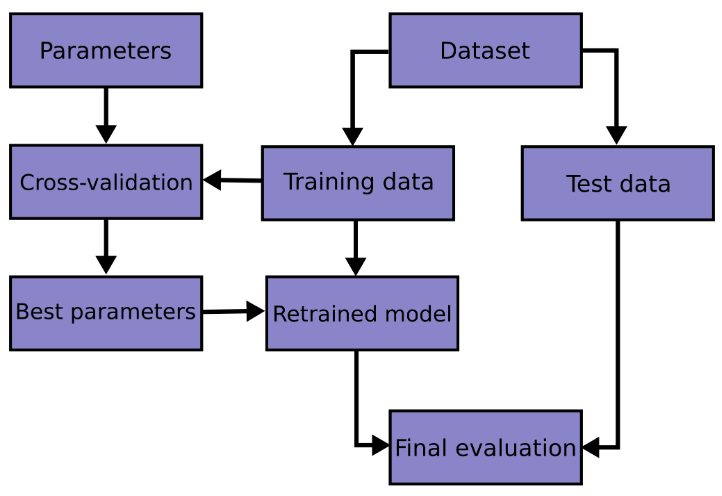

A validação cruzada é uma técnica que envolve a divisão do conjunto de dados em múltiplos subconjuntos, chamados de folds. Nesse processo, o modelo é treinado em um subconjunto específico dos dados e, em seguida, testado em outro subconjunto, garantindo uma avaliação de desempenho mais robusta. Essa abordagem minimiza o viés associado à superexposição aos dados de treinamento, proporcionando uma estimativa mais precisa da capacidade de generalização do modelo em dados não vistos.















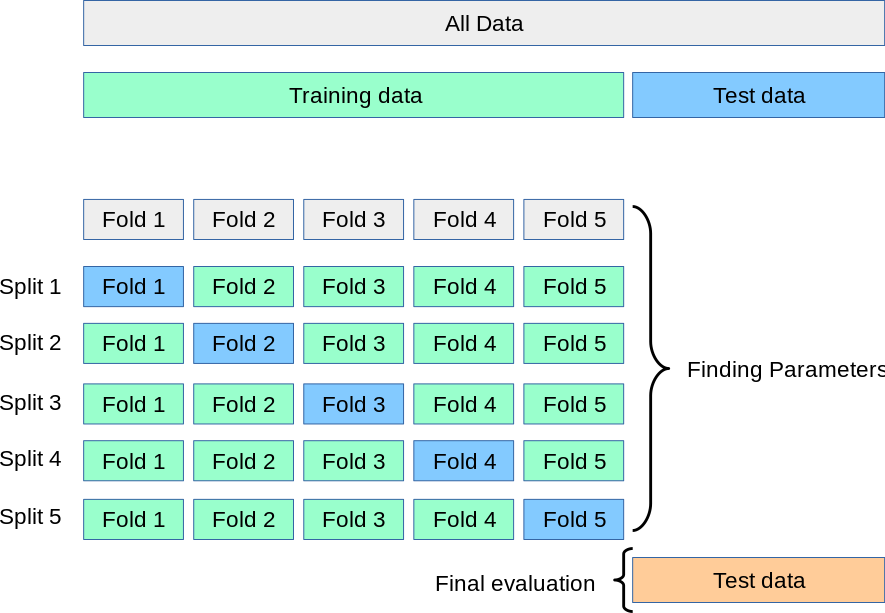

A seguir, apresenta-se uma implementação prática da validação cruzada utilizando a técnica K-Fold.

In [ ]:
from sklearn.model_selection import KFold

# Definir o número de folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Criar um pipeline completo que inclui o pré-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(max_depth=10, random_state=42))
])

# Listas para armazenar os resultados de RMSE e R²
rmse_scores = []
r2_scores = []

# Loop para realizar a validação cruzada
for train_index, test_index in kf.split(X_train):
    # Usar iloc para indexar corretamente os DataFrames
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]

    # Treinar o modelo
    pipeline.fit(X_fold_train, y_fold_train)

    # Fazer previsões
    y_pred = pipeline.predict(X_fold_val)

    # Avaliar o modelo
    rmse = root_mean_squared_error(y_fold_val, y_pred)
    r2 = r2_score(y_fold_val, y_pred)

    # Armazenar os resultados
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calcular médias e desvios padrão
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Imprimir os resultados
print(f'Média RMSE: {mean_rmse:.3f} ± {std_rmse:.3f}')
print(f'Média R²: {mean_r2:.3f} ± {std_r2:.3f}')


O ajuste de hiperparâmetros é o processo de otimização dos parâmetros que não são aprendidos diretamente pelo modelo durante o treinamento, mas que afetam seu desempenho, como a profundidade máxima em árvores. Uma estratégia comum para ajustar hiperparâmetros é a busca em grade ou [Grid Search](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html), onde um espaço de hiperparâmetros é definido e o modelo é avaliado para cada combinação de parâmetros usando validação cruzada.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Criar um pipeline completo que inclui o pré-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

# Definir a grade de parâmetros para otimização
param_grid = {
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='r2', n_jobs=-1)

# Treinar o modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Extrair os melhores parâmetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Avaliar o desempenho do modelo otimizado
y_pred = best_model.predict(X_test)

# Calcular RMSE e R²
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir os melhores parâmetros e os resultados de desempenho
print(f'Melhores parâmetros: {best_params}')
print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')


## **6. Avaliação dos Resultados**


Os melhores parâmetros encontrados pelo GridSearchCV são:

- `max_depth`: 10
- `min_samples_leaf`: 4
- `min_samples_split`: 10

Isso significa que, dentre as combinações testadas, uma árvore de decisão com profundidade máxima de 10, mínimo de 4 amostras por folha e mínimo de 10 amostras para dividir um nó interno resultou no melhor desempenho de acordo com a métrica de avaliação utilizada (R²).

### **Root Mean Squared Error (RMSE)**

É uma métrica que quantifica o desvio médio das previsões de um modelo em relação aos valores reais. O cálculo é feito da seguinte forma:

- **Cálculo dos erros (resíduos)**: Para cada observação $i$ no conjunto de teste, o erro (ou resíduo) é definido como:
  - $e_i=y_{pred_i}-y_{test_i}$.
    - $y_{pred_i}$ é o valor previso pelo modelo para a observação $i$.
    - $y_{test_i}$ é o valor real (observado) para a observação $i$.

- **Média dos erros quadráticos (MSE)**: A média dos erros quadráticos é calculada sobre todas as $n$ observações no conjunto de teste:

  - $MSE=\frac{1}{n}\sum_{i=1}^n e_i^2$

- **Raiz quadrada da média (RMSE)**: O RMSE é a raiz quadrada do MSE:
  -  $RMSE = \sqrt{MSE}$

A função `calcular_rmse` implementa o cálculo do Root Mean Squared Error (RMSE)



In [ ]:
def calcular_rmse(y_test, y_pred):
    """
    Calcula o RMSE (Root Mean Squared Error) entre os valores reais (y_test) e os valores previstos (y_pred).

    Args:
        y_test: Array NumPy com os valores reais.
        y_pred: Array NumPy com os valores previstos.

    Returns:
        O valor do RMSE.
    """

    # Calcular os erros (resíduos)
    erros = y_pred - y_test

    # Calcular a média dos erros quadráticos (MSE)
    mse = np.mean(np.square(erros))

    # Calcular a raiz quadrada da média (RMSE)
    rmse = np.sqrt(mse)

    return rmse

Exemplo de uso

In [ ]:
rmse = calcular_rmse(y_test, y_pred)
print(f'O RMSE do modelo é: {rmse:.2f}')

O RMSE reflete o desvio padrão dos resíduos, oferecendo uma medida da dispersão das previsões em relação aos valores observados, mantendo a mesma unidade de medida da variável alvo. No contexto deste problema, o RMSE indica que o erro médio das previsões do modelo é de aproximadamente 60.102,77 dólares, caracterizando a magnitude média das discrepâncias entre as previsões e os valores reais. Isso implica que, em média, o modelo está subestimando ou superestimando os valores reais em torno dessa ordem de grandeza.








### **Coeficiente de Determinação (R²)**

É uma métrica que complementa o RMSE, quantificando a proporção da variabilidade da variável dependente que é explicada pelo modelo em relação à variabilidade total. Ele varia entre 0 e 1, onde 1 indica que o modelo explica 100% da variação dos dados, e 0 significa que o modelo não explica nada além da média dos valores observados. Enquanto o RMSE expressa o erro médio das previsões na mesma unidade da variável alvo, o R² avalia o quão bem o modelo captura a variação nos dados. O cálculo é realizado da seguinte forma:

- **Cálculo da soma total dos quadrados (SST)**: Primeiro, calcula-se a variabilidade total dos dados em relação à média dos valores reais. Para cada observação $i$, o desvio em relação à média $\bar{y}_{test}$ é elevado ao quadrado:
  - $SST = \sum_{i=1}^n (y_{test_i} - \bar{y}_{test})^2$

- **Cálculo da soma dos resíduos ao quadrado (SSR)**: Em seguida, calcula-se a soma dos quadrados dos resíduos, ou seja, a diferença entre as previsões do modelo e os valores reais:
  - $SSR = \sum_{i=1}^n (y_{test_i} - y_{pred_i})^2$

- **Cálculo do R²**: O R² é dado pela fração da variabilidade total explicada pelo modelo, que pode ser expressa como:
 - $R²=1-\frac{SSR}{SST}$

A função `calcular_r2` implementa o cálculo do Coeficiente de Determinação (R²)

In [ ]:
def calcular_r2(y_test, y_pred):
  """
  Calcula o coeficiente de determinação R² entre os valores reais (y_test) e os valores previstos (y_pred).

  Args:
      y_test: Array NumPy com os valores reais.
      y_pred: Array NumPy com os valores previstos.

  Returns:
      O valor do R².
  """

  # Calcular a média dos valores reais
  media_y_test = np.mean(y_test)

  # Calcular a Soma dos Quadrados Total (SST)
  sst = np.sum(np.square(y_test - media_y_test))

  # Calcular a Soma dos Quadrados dos Resíduos (SSR)
  ssr = np.sum(np.square(y_test - y_pred))

  # Calcular o R²
  r2 = 1 - (ssr / sst)

  return r2

Exemplo de uso

In [ ]:
r2 = calcular_r2(y_test, y_pred)
print(f'R²: {r2:.3f}')

O R² de 0.724 indica que aproximadamente 72.4% da variância nos preços dos imóveis (ou qualquer que seja a sua variável alvo) é explicada pelo seu modelo. Embora seja um resultado satisfatório, denota que ainda existe uma parcela considerável da variabilidade que não é capturada pelo modelo, abrindo espaço para aprimoramentos através de técnicas como otimização de hiperparâmetros, seleção de features, engenharia de features ou exploração de modelos mais complexos.

## **7. Exercício**

**Objetivo**:

Propor melhorias que possam aumentar a acurácia e a capacidade explicativa do modelo.

**Sugestões:**

- **Engenharia de Features:** Crie novas features que possam capturar informações relevantes não presentes nas features originais.
- **Novos Modelos:** Explore o uso de algoritmos [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) ou [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).
- **Random Search:** Utilize a técnica de [Random Search](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) para otimizar os hiperparâmetros dos modelos.

**Desafio Adicional:**

- Utilize técnicas de visualização para entender melhor o impacto das novas features e a performance dos modelos.
- Documente suas análises e resultados para facilitar a interpretação e a comunicação das suas descobertas.

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV

def engenharia_de_features(X):
  X["cômodos_por_casa"] = X["total_cômodos"] / X["domicílios"]
  X['razao_quartos'] = X["total_quartos"] / X["total_cômodos"]
  X['geolocalizacao'] = X['latitude'] / X['longitude']
  return X

### Decision Tree

In [ ]:
# Pipeline com engenharia de features e DecisionTreeRegressor
pipeline_dt = Pipeline([
    ('engenharia_de_features', FunctionTransformer(engenharia_de_features)),  # Aplicação da engenharia de features
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', DecisionTreeRegressor(random_state=42))  # Modelo Decision Tree
])

# Definição do grid de hiperparâmetros para Decision Tree
param_grid_dt = {
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# RandomizedSearch para otimização de hiperparâmetros
random_search_dt = RandomizedSearchCV(
    estimator=pipeline_dt,
    param_distributions=param_grid_dt,
    n_iter=40,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# Treinamento do modelo com os melhores hiperparâmetros
random_search_dt.fit(X_train, y_train)

# Melhor modelo encontrado
best_dt_model = random_search_dt.best_estimator_

# Previsões e métricas de avaliação
y_pred_dt = best_dt_model.predict(X_test)
rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Exibição dos resultados
print(f'Decision Tree - RMSE: {rmse_dt:.3f}, R²: {r2_dt:.3f}')

# Melhores hiperparâmetros encontrados
best_params_dt = random_search_dt.best_params_
print(f'Melhores hiperparâmetros: {best_params_dt}')

### Random Forest

In [ ]:
# Pipeline sem engenharia de features
pipeline_rf_no_feat = Pipeline([
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', RandomForestRegressor(random_state=42))  # Modelo Random Forest
])

# Pipeline com engenharia de features
pipeline_rf_with_feat = Pipeline([
    ('engenharia_de_features', FunctionTransformer(engenharia_de_features)),  # Aplicação da engenharia de features
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', RandomForestRegressor(random_state=42))  # Modelo Random Forest
])

# Definição do grid de hiperparâmetros
param_grid_rf = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# RandomizedSearch para otimização de hiperparâmetros - sem engenharia de features
random_search_rf_no_feat = RandomizedSearchCV(
    estimator=pipeline_rf_no_feat,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# RandomizedSearch para otimização de hiperparâmetros - com engenharia de features
random_search_rf_with_feat = RandomizedSearchCV(
    estimator=pipeline_rf_with_feat,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# Treinamento dos modelos com e sem engenharia de features
random_search_rf_no_feat.fit(X_train, y_train)
random_search_rf_with_feat.fit(X_train, y_train)

# Melhores modelos encontrados
best_rf_model_no_feat = random_search_rf_no_feat.best_estimator_
best_rf_model_with_feat = random_search_rf_with_feat.best_estimator_

# Previsões e métricas de avaliação - sem engenharia de features
y_pred_rf_no_feat = best_rf_model_no_feat.predict(X_test)
rmse_rf_no_feat = root_mean_squared_error(y_test, y_pred_rf_no_feat)
r2_rf_no_feat = r2_score(y_test, y_pred_rf_no_feat)

# Previsões e métricas de avaliação - com engenharia de features
y_pred_rf_with_feat = best_rf_model_with_feat.predict(X_test)
rmse_rf_with_feat = root_mean_squared_error(y_test, y_pred_rf_with_feat)
r2_rf_with_feat = r2_score(y_test, y_pred_rf_with_feat)

# Exibição dos resultados
print(f'Random Forest sem engenharia de features - RMSE: {rmse_rf_no_feat:.3f}, R²: {r2_rf_no_feat:.3f}')
print(f'Random Forest com engenharia de features - RMSE: {rmse_rf_with_feat:.3f}, R²: {r2_rf_with_feat:.3f}')

# Melhores hiperparâmetros encontrados
best_params_rf_no_feat = random_search_rf_no_feat.best_params_
best_params_rf_with_feat = random_search_rf_with_feat.best_params_
print(f'Melhores hiperparâmetros (sem features): {best_params_rf_no_feat}')
print(f'Melhores hiperparâmetros (com features): {best_params_rf_with_feat}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline com engenharia de features e RandomForestRegressor
pipeline_rf_no_feat = Pipeline([
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', RandomForestRegressor(random_state=42))  # Modelo Random Forest
])

# Definição do grid de hiperparâmetros
param_grid_rf = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# RandomizedSearch para otimização de hiperparâmetros
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf_no_feat,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# Treinamento do modelo com os melhores hiperparâmetros
random_search_rf.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf_model = random_search_rf.best_estimator_

# Previsões e métricas de avaliação
y_pred_rf = best_rf_model.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Exibição dos resultados
print(f'Random Forest - RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}')

# Melhores hiperparâmetros encontrados
best_params_rf = random_search_rf.best_params_
print(f'Melhores hiperparâmetros: {best_params_rf}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline com engenharia de features e RandomForestRegressor
pipeline_rf = Pipeline([
    ('engenharia_de_features', FunctionTransformer(engenharia_de_features)),  # Aplicação da engenharia de features
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', RandomForestRegressor(random_state=42))  # Modelo Random Forest
])

# Definição do grid de hiperparâmetros
param_grid_rf = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# RandomizedSearch para otimização de hiperparâmetros
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# Treinamento do modelo com os melhores hiperparâmetros
random_search_rf.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf_model = random_search_rf.best_estimator_

# Previsões e métricas de avaliação
y_pred_rf = best_rf_model.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Exibição dos resultados
print(f'Random Forest - RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}')

# Melhores hiperparâmetros encontrados
best_params_rf = random_search_rf.best_params_
print(f'Melhores hiperparâmetros: {best_params_rf}')

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline com engenharia de features e GradientBoostingRegressor
pipeline_gb = Pipeline([
    ('engenharia_de_features', FunctionTransformer(engenharia_de_features)),  # Aplicação da engenharia de features
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', GradientBoostingRegressor(random_state=42))  # Modelo Gradient Boosting
])

# Definição do grid de hiperparâmetros
param_grid_gb = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__learning_rate': [0.01, 0.1, 0.05],  # Taxa de aprendizado
    'modelo__max_depth': [3, 5, 10],  # Profundidade máxima da árvore
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__subsample': [0.8, 1.0]  # Fração de amostras usadas para treinamento de cada árvore
}

# RandomizedSearch para otimização de hiperparâmetros
random_search_gb = RandomizedSearchCV(
    estimator=pipeline_gb,
    param_distributions=param_grid_gb,
    n_iter=10,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# Treinamento do modelo com os melhores hiperparâmetros
random_search_gb.fit(X_train, y_train)

# Melhor modelo encontrado
best_gb_model = random_search_gb.best_estimator_

# Previsões e métricas de avaliação
y_pred_gb = best_gb_model.predict(X_test)
rmse_gb = root_mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Exibição dos resultados
print(f'Gradient Boosting - RMSE: {rmse_gb:.3f}, R²: {r2_gb:.3f}')

# Melhores hiperparâmetros encontrados
best_params_gb = random_search_gb.best_params_
print(f'Melhores hiperparâmetros: {best_params_gb}')

https://www.kaggle.com/code/camnugent/geospatial-feature-engineering-and-visualization

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Função para treinar e avaliar o modelo
def treinar_e_avaliar(pipeline, X_train, y_train, X_test, y_test, param_grid, kf):
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid,
        n_iter=10,
        cv=kf,
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return best_model, rmse, r2, random_search.best_params_

# Definição do grid de hiperparâmetros para Gradient Boosting
param_grid_gb = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__learning_rate': [0.01, 0.1, 0.05],
    'modelo__max_depth': [3, 5, 10],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__subsample': [0.8, 1.0]
}

# Pipeline sem engenharia de features
pipeline_gb_no_feat = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', GradientBoostingRegressor(random_state=42))
])

# Pipeline com engenharia de features
pipeline_gb_with_feat = Pipeline([
    ('engenharia_de_features', FunctionTransformer(engenharia_de_features)),
    ('preprocessador', preprocessador),
    ('modelo', GradientBoostingRegressor(random_state=42))
])

# Treinamento e avaliação - sem engenharia de features
best_gb_model_no_feat, rmse_gb_no_feat, r2_gb_no_feat, best_params_gb_no_feat = treinar_e_avaliar(
    pipeline_gb_no_feat, X_train, y_train, X_test, y_test, param_grid_gb, kf
)

# Treinamento e avaliação - com engenharia de features
best_gb_model_with_feat, rmse_gb_with_feat, r2_gb_with_feat, best_params_gb_with_feat = treinar_e_avaliar(
    pipeline_gb_with_feat, X_train, y_train, X_test, y_test, param_grid_gb, kf
)

# Exibição dos resultados
print(f'Gradient Boosting sem engenharia de features - RMSE: {rmse_gb_no_feat:.3f}, R²: {r2_gb_no_feat:.3f}')
print(f'Gradient Boosting com engenharia de features - RMSE: {rmse_gb_with_feat:.3f}, R²: {r2_gb_with_feat:.3f}')

# Melhores hiperparâmetros encontrados
print(f'Melhores hiperparâmetros (sem features): {best_params_gb_no_feat}')
print(f'Melhores hiperparâmetros (com features): {best_params_gb_with_feat}')
